## Stat652_Homework02
- Author: "Rohit Shelar"
- date: "20/02/2021"

### 10.6 Exercises: Problem 3

Investigators in the HELP (Health Evaluation and Linkage to Primary Care) study were interested in modeling the probability of being homeless (one or more nights spent on the street or in a shelter in the past six months vs. housed) as a function of age.

Generate a confusion matrix for the null model and interpret the result.

Fit and interpret logistic regression model for the probability of being homeless as a function of age.

What is the predicted probability of being homeless for a 20 year old? For a 40 year old?

Generate a confusion matrix for the second model and interpret the result.

### Answer:

In [1]:
import pandas as pd
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

In [2]:
HELPrct =  pd.read_csv("HELPrct.csv")
HELPrct.columns

Index(['Unnamed: 0', 'age', 'anysubstatus', 'anysub', 'cesd', 'd1',
       'daysanysub', 'dayslink', 'drugrisk', 'e2b', 'female', 'sex', 'g1b',
       'homeless', 'i1', 'i2', 'id', 'indtot', 'linkstatus', 'link', 'mcs',
       'pcs', 'pss_fr', 'racegrp', 'satreat', 'sexrisk', 'substance', 'treat',
       'avg_drinks', 'max_drinks', 'hospitalizations'],
      dtype='object')

In [3]:
print('Percentage division of Homeless Categories')
HELPrct['homeless'].value_counts(normalize=True) * 100

Percentage division of Homeless Categories


housed      53.863135
homeless    46.136865
Name: homeless, dtype: float64

#### Null Model and Accuracy Report 

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       209
           1       0.54      1.00      0.70       244

    accuracy                           0.54       453
   macro avg       0.27      0.50      0.35       453
weighted avg       0.29      0.54      0.38       453

-------------------------- Confusion matrix --------------------------



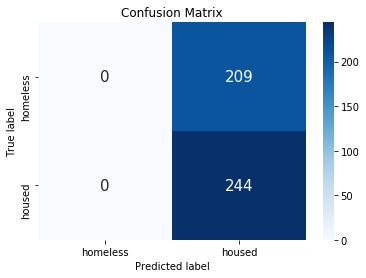

In [4]:
HELPrct_actual = HELPrct['homeless'].to_list()
HELPrct_null = ['housed' for i in range(len(HELPrct['homeless']))]
_y_pred_null=[1 if x == 'housed' else 0 for x in HELPrct_null]
_y_test_null=[1 if x == 'housed' else 0 for x in HELPrct_actual]

print('----------------------- Classification Report ------------------------\n')
print(metrics.classification_report(_y_test_null, _y_pred_null))

cf_matrix = confusion_matrix(_y_test_null,_y_pred_null)
ax= plt.subplot()
sns.heatmap(cf_matrix, cmap="Blues", annot=True,annot_kws={"size": 15},fmt='',ax = ax)# font size
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['homeless', 'housed'])
ax.yaxis.set_ticklabels(['homeless', 'housed'])
print('-------------------------- Confusion matrix --------------------------\n')

#### What is the predicted probability of being homeless for a 20 year old? For a 40 year old?

In [5]:
X = HELPrct['age'].values.reshape(-1, 1)
y = HELPrct['homeless'].values

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = clf.predict(X)
y_pred_proba = clf.predict_proba(X)
#clf.score(X, y)

In [7]:
HELPrct["proba_homeless"],HELPrct["proba_housed"] = y_pred_proba[:,0], y_pred_proba[:,1]
sub_20 = HELPrct[HELPrct['age'] ==20]
sub_40 = HELPrct[HELPrct['age'] ==40]
print("Predicted probability of being homeless for a 20 year old: ", sub_20['proba_homeless'].to_list()[0])
print("Predicted probability of being homeless for a 40 year old: ", sub_40['proba_homeless'].to_list()[0])

Predicted probability of being homeless for a 20 year old:  0.3757575407281232
Predicted probability of being homeless for a 40 year old:  0.4854853529073092


#### logistic regression model for the probability of being homeless as a function of age

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
from sklearn.linear_model import LogisticRegression
#X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print("Training Accuracy: ",logistic.score(X_train, y_train))
print("Testing Accuracy: ", logistic.score(X_test, y_test))

Training Accuracy:  0.5752212389380531
Testing Accuracy:  0.543859649122807


#### Generate a confusion matrix for the second model and interpret the result.

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

    homeless       0.65      0.22      0.33        58
      housed       0.52      0.88      0.65        56

    accuracy                           0.54       114
   macro avg       0.59      0.55      0.49       114
weighted avg       0.59      0.54      0.49       114

-------------------------- Confusion matrix --------------------------



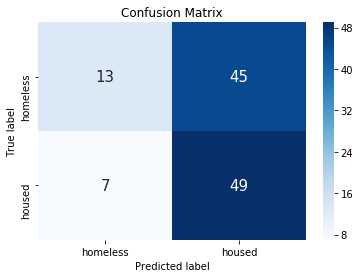

In [9]:
%matplotlib inline
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(logistic,X_test, y_test, cmap='Blues')

cf_matrix = confusion_matrix(y_test,y_pred)

print('----------------------- Classification Report ------------------------\n')
print(metrics.classification_report(y_test, y_pred))

ax= plt.subplot()
sns.heatmap(cf_matrix, cmap="Blues", annot=True,annot_kws={"size": 15},fmt='',ax = ax)# font size
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['homeless', 'housed'])
ax.yaxis.set_ticklabels(['homeless', 'housed'])
print('-------------------------- Confusion matrix --------------------------\n')

### 11.7 Exercises: Problem 6a without SleepHrsNight variable
#### Run Models 1. Null Model, 2. KNN 3. Logistic Regression, 
using training and test datasets, as described in part c of the problem i.e. 25% test split

### Answer:

The accuracy of Null Model is : 0.75

The accuracy of KNN Model is : 0.76

The accuracy of Logistic Regression Model is : 0.76

In [10]:
import pandas as pd
df = pd.read_csv("NHANES.csv")
print(df.columns)
df.head(3)

Index(['Unnamed: 0', 'ID', 'SurveyYr', 'Gender', 'Age', 'AgeDecade',
       'AgeMonths', 'Race1', 'Race3', 'Education', 'MaritalStatus', 'HHIncome',
       'HHIncomeMid', 'Poverty', 'HomeRooms', 'HomeOwn', 'Work', 'Weight',
       'Length', 'HeadCirc', 'Height', 'BMI', 'BMICatUnder20yrs', 'BMI_WHO',
       'Pulse', 'BPSysAve', 'BPDiaAve', 'BPSys1', 'BPDia1', 'BPSys2', 'BPDia2',
       'BPSys3', 'BPDia3', 'Testosterone', 'DirectChol', 'TotChol',
       'UrineVol1', 'UrineFlow1', 'UrineVol2', 'UrineFlow2', 'Diabetes',
       'DiabetesAge', 'HealthGen', 'DaysPhysHlthBad', 'DaysMentHlthBad',
       'LittleInterest', 'Depressed', 'nPregnancies', 'nBabies', 'Age1stBaby',
       'SleepHrsNight', 'SleepTrouble', 'PhysActive', 'PhysActiveDays',
       'TVHrsDay', 'CompHrsDay', 'TVHrsDayChild', 'CompHrsDayChild',
       'Alcohol12PlusYr', 'AlcoholDay', 'AlcoholYear', 'SmokeNow', 'Smoke100',
       'Smoke100n', 'SmokeAge', 'Marijuana', 'AgeFirstMarij', 'RegularMarij',
       'AgeRegMarij', 'HardD

,Unnamed: 0,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,...,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
0,1,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
1,2,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
2,3,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN


In [11]:
# selecting desired columns from whole dataset
data = df[['Age', 'AgeMonths', 'HHIncomeMid', 'Poverty', 'HomeRooms', 'Weight', 'Length', 'HeadCirc', 'Height', 'BMI', 'Pulse', 'BPSysAve', 'BPDiaAve', 'BPSys1', 'BPDia1', 'BPSys2', 'BPDia2', 'BPSys3', 'BPDia3', 'Testosterone', 'DirectChol', 'TotChol', 'UrineVol1', 'UrineFlow1', 'UrineVol2', 'UrineFlow2', 'DiabetesAge', 'DaysPhysHlthBad', 'nPregnancies', 'nBabies', 'Age1stBaby', 'PhysActiveDays','TVHrsDay', 'CompHrsDay','SleepTrouble']]

In [12]:
print('Length of dataset: ', len(data))

Length of dataset:  10000


In [13]:
print('SleepTrouble Column Distribution')
data['SleepTrouble'].value_counts()

SleepTrouble Column Distribution


No     5799
Yes    1973
Name: SleepTrouble, dtype: int64

In [14]:
import numpy as np
data_sleeptrouble = data[~data['SleepTrouble'].isna()]
missing_sleeptrouble = data[data['SleepTrouble'].isna()]
print('Dataset after removing missing entries in label column: ',len(data_sleeptrouble))
print('Dataset without label (Can be used for prediction): ',len(missing_sleeptrouble))

Dataset after removing missing entries in label column:  7772
Dataset without label (Can be used for prediction):  2228


In [15]:
data_sleeptrouble.isna().sum()

Age                   0
AgeMonths          3999
HHIncomeMid         672
Poverty             597
HomeRooms            64
Weight               66
Length             7772
HeadCirc           7772
Height               60
BMI                  72
Pulse               282
BPSysAve            293
BPDiaAve            293
BPSys1              570
BPDia1              570
BPSys2              454
BPDia2              454
BPSys3              437
BPDia3              437
Testosterone       4214
DirectChol          427
TotChol             427
UrineVol1           105
UrineFlow1          532
UrineVol2          6539
UrineFlow2         6541
DiabetesAge        7155
DaysPhysHlthBad     795
nPregnancies       5168
nBabies            5356
Age1stBaby         5888
PhysActiveDays     3896
TVHrsDay           3931
CompHrsDay         3929
SleepTrouble          0
dtype: int64

In [16]:
# Droping columns with more than 50% missing values
data_sleeptrouble = data_sleeptrouble.drop(columns=['AgeMonths','Length','HeadCirc','Testosterone',
                                                   'UrineVol2','UrineFlow2','DiabetesAge','nPregnancies',
                                                    'nBabies', 'Age1stBaby', 'PhysActiveDays', 'TVHrsDay',
                                                    'CompHrsDay'])

In [17]:
data_sleeptrouble.isna().sum()

Age                  0
HHIncomeMid        672
Poverty            597
HomeRooms           64
Weight              66
Height              60
BMI                 72
Pulse              282
BPSysAve           293
BPDiaAve           293
BPSys1             570
BPDia1             570
BPSys2             454
BPDia2             454
BPSys3             437
BPDia3             437
DirectChol         427
TotChol            427
UrineVol1          105
UrineFlow1         532
DaysPhysHlthBad    795
SleepTrouble         0
dtype: int64

In [18]:
# Filling the missing values with mean value of respective columns
data_sleeptrouble_variables =  data_sleeptrouble.drop(columns='SleepTrouble')
data_sleeptrouble_variables = data_sleeptrouble_variables.apply(lambda x: x.fillna(x.mean()),axis=0)
data_sleeptrouble_variables['SleepTrouble'] = pd.Series(data_sleeptrouble['SleepTrouble'])
data_sleeptrouble = data_sleeptrouble_variables
data_sleeptrouble.isna().sum()

Age                0
HHIncomeMid        0
Poverty            0
HomeRooms          0
Weight             0
Height             0
BMI                0
Pulse              0
BPSysAve           0
BPDiaAve           0
BPSys1             0
BPDia1             0
BPSys2             0
BPDia2             0
BPSys3             0
BPDia3             0
DirectChol         0
TotChol            0
UrineVol1          0
UrineFlow1         0
DaysPhysHlthBad    0
SleepTrouble       0
dtype: int64

In [19]:
from sklearn import preprocessing
# Clean Dataframe with no missing values 
data_sleeptrouble.head()

,Age,HHIncomeMid,Poverty,HomeRooms,Weight,Height,BMI,Pulse,BPSysAve,BPDiaAve,...,BPSys2,BPDia2,BPSys3,BPDia3,DirectChol,TotChol,UrineVol1,UrineFlow1,DaysPhysHlthBad,SleepTrouble
0,34,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,85.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
1,34,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,85.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
2,34,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,85.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
4,49,40000.0,1.91,5.0,86.7,168.4,30.57,86.0,112.0,75.0,...,108.0,74.0,116.0,76.0,1.16,6.70,77.0,0.094000,0.0,Yes
7,45,87500.0,5.00,6.0,75.7,166.7,27.24,62.0,118.0,64.0,...,118.0,68.0,118.0,60.0,2.12,5.82,106.0,1.116000,0.0,No


#### Null Model

In [20]:
data_sleeptrouble['SleepTrouble'].value_counts()

No     5799
Yes    1973
Name: SleepTrouble, dtype: int64

In [21]:
from sklearn import metrics
data_sleeptrouble_actual = data_sleeptrouble['SleepTrouble'].to_list()
data_sleeptrouble_null = ['No' for i in range(len(data_sleeptrouble['SleepTrouble']))]
_y_pred_null=[0 if x == 'No' else 1 for x in data_sleeptrouble_null]
_y_test_null=[0 if x == 'No' else 1 for x in data_sleeptrouble_actual]
#print(metrics.classification_report(_y_test_null, _y_pred_null, labels=[0, 1]))

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      5799
           1       0.00      0.00      0.00      1973

    accuracy                           0.75      7772
   macro avg       0.37      0.50      0.43      7772
weighted avg       0.56      0.75      0.64      7772

-------------------------- Confusion matrix --------------------------



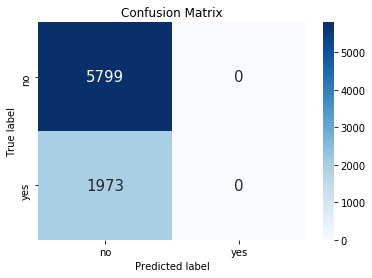

In [22]:
print('----------------------- Classification Report ------------------------\n')
print(metrics.classification_report(_y_test_null, _y_pred_null))

cf_matrix = confusion_matrix(_y_test_null,_y_pred_null)
ax= plt.subplot()
sns.heatmap(cf_matrix, cmap="Blues", annot=True,annot_kws={"size": 15},fmt='',ax = ax)# font size
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['no', 'yes'])
ax.yaxis.set_ticklabels(['no', 'yes'])
print('-------------------------- Confusion matrix --------------------------\n')

In [110]:
# This code is trial for upsampling of the dataset
# from sklearn.utils import resample
# # Separate majority and minority classes
# df_majority = data_sleeptrouble[data_sleeptrouble.SleepTrouble=='No']
# df_minority = data_sleeptrouble[data_sleeptrouble.SleepTrouble=='Yes']
 
# # Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=5799,    # to match majority class
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# # Display new class counts
# df_upsampled.SleepTrouble.value_counts()
# data_sleeptrouble = df_upsampled

#### K Neighbors Classifier

In [23]:
# Scaling the dataset using MinMaxScaler
from sklearn.model_selection import train_test_split
X =  data_sleeptrouble.drop(columns='SleepTrouble')
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
y = data_sleeptrouble['SleepTrouble'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
# Using GridSearchCV to find best posible K value 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(60, 120)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)
print("Best Possible Parameter: ", knn_gscv.best_params_)
print("Best Accuracy Score: ", knn_gscv.best_score_)

Best Possible Parameter:  {'n_neighbors': 118}
Best Accuracy Score:  0.7474698724225002


In [60]:
# Let's take K=119 as odd values
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 119)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy Score: ", knn.score(X_test, y_test))

Accuracy Score:  0.7622233659289758


----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      1472
           1       0.57      0.06      0.10       471

    accuracy                           0.76      1943
   macro avg       0.67      0.52      0.48      1943
weighted avg       0.72      0.76      0.68      1943



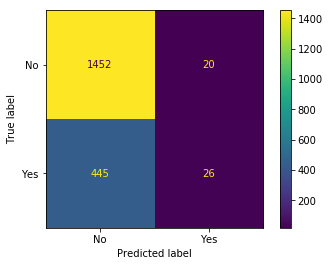

In [28]:
_y_pred=[0 if x == 'No' else 1 for x in y_pred]
_y_test=[0 if x == 'No' else 1 for x in y_test]
from sklearn import metrics
print('----------------------- Classification Report ------------------------\n')
print(metrics.classification_report(_y_test, _y_pred, labels=[0, 1]))

# Confusion matrix 
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)  

#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logistic = LogisticRegression()

In [30]:
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print("Accuracy Score: ", logistic.score(X_test, y_test))

Accuracy Score:  0.7575913535769428


----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1472
           1       0.50      0.07      0.12       471

    accuracy                           0.76      1943
   macro avg       0.63      0.52      0.49      1943
weighted avg       0.70      0.76      0.68      1943

-------------------------- Confusion matrix --------------------------



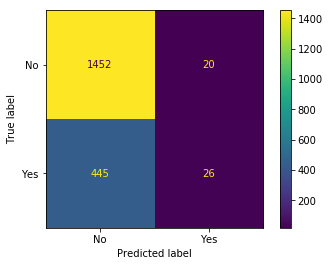

In [31]:
print('----------------------- Classification Report ------------------------\n')
_y_pred=[0 if x == 'No' else 1 for x in y_pred]
_y_test=[0 if x == 'No' else 1 for x in y_test]
print(metrics.classification_report(_y_test, _y_pred, labels=[0, 1]))

print('-------------------------- Confusion matrix --------------------------\n')
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)  

### 6B Problem with SleepHrsNight Variable
#### 11.7 Exercises: Problem 6b, Run Models 1. Null Model, 2. KNN, 3. Multiple Linear Regression, 4. Decision Tree 
Using training and test datasets, as described in part c of the problem i.e. 25% test split

### Answer:

The accuracy of Null Model is : 0.75

The accuracy of KNN Model is : 0.77

The accuracy of Multiple Linear Regression Model is : 0.76

The accuracy of Decision Tree Model is : 0.83

Linear Regression, Logictic Regression, KNN can not handle missing data whereas Decision Tree can handle Missing values

In [32]:
# Original Dataset
df.head()

,Unnamed: 0,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,...,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
0,1,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
1,2,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
2,3,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
3,4,51625,2009_10,male,4,0-9,49.0,Other,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,51630,2009_10,female,49,40-49,596.0,White,NaN,Some College,...,No,NaN,Yes,Yes,12.0,10.0,1.0,Yes,Heterosexual,NaN


In [33]:
# Desired columns inclusing column : CompHrsDay
data = df[['Age','SleepHrsNight','AgeMonths', 'HHIncomeMid', 'Poverty', 'HomeRooms', 'Weight', 'Length', 'HeadCirc', 'Height', 'BMI', 'Pulse', 'BPSysAve', 'BPDiaAve', 'BPSys1', 'BPDia1', 'BPSys2', 'BPDia2', 'BPSys3', 'BPDia3', 'Testosterone', 'DirectChol', 'TotChol', 'UrineVol1', 'UrineFlow1', 'UrineVol2', 'UrineFlow2', 'DiabetesAge', 'DaysPhysHlthBad', 'nPregnancies', 'nBabies', 'Age1stBaby', 'PhysActiveDays','TVHrsDay', 'CompHrsDay','SleepTrouble']]

In [34]:
data.isna().sum()
import numpy as np
data_sleeptrouble = data[~data['SleepTrouble'].isna()]
missing_sleeptrouble = data[data['SleepTrouble'].isna()]
print("Length dataset after removing missing entries in label data: ",len(data_sleeptrouble))
print("Length dataset with missing entries in label data (can be used for prediction):",len(missing_sleeptrouble))

Length dataset after removing missing entries in label data:  7772
Length dataset with missing entries in label data (can be used for prediction): 2228


In [35]:
data_sleeptrouble.isna().sum()

Age                   0
SleepHrsNight        17
AgeMonths          3999
HHIncomeMid         672
Poverty             597
HomeRooms            64
Weight               66
Length             7772
HeadCirc           7772
Height               60
BMI                  72
Pulse               282
BPSysAve            293
BPDiaAve            293
BPSys1              570
BPDia1              570
BPSys2              454
BPDia2              454
BPSys3              437
BPDia3              437
Testosterone       4214
DirectChol          427
TotChol             427
UrineVol1           105
UrineFlow1          532
UrineVol2          6539
UrineFlow2         6541
DiabetesAge        7155
DaysPhysHlthBad     795
nPregnancies       5168
nBabies            5356
Age1stBaby         5888
PhysActiveDays     3896
TVHrsDay           3931
CompHrsDay         3929
SleepTrouble          0
dtype: int64

In [36]:
# Dropping all the columns with more than 50% missing values 
data_sleeptrouble = data_sleeptrouble.drop(columns=['AgeMonths','Length','HeadCirc','Testosterone',
                                                   'UrineVol2','UrineFlow2','DiabetesAge','nPregnancies',
                                                    'nBabies', 'Age1stBaby', 'PhysActiveDays', 'TVHrsDay',
                                                    'CompHrsDay'])

In [37]:
data_sleeptrouble.isna().sum()

Age                  0
SleepHrsNight       17
HHIncomeMid        672
Poverty            597
HomeRooms           64
Weight              66
Height              60
BMI                 72
Pulse              282
BPSysAve           293
BPDiaAve           293
BPSys1             570
BPDia1             570
BPSys2             454
BPDia2             454
BPSys3             437
BPDia3             437
DirectChol         427
TotChol            427
UrineVol1          105
UrineFlow1         532
DaysPhysHlthBad    795
SleepTrouble         0
dtype: int64

In [38]:
# Filling the missing values with mean value of respective columns
data_sleeptrouble_variables =  data_sleeptrouble.drop(columns='SleepTrouble')
data_sleeptrouble_variables = data_sleeptrouble_variables.apply(lambda x: x.fillna(x.mean()),axis=0)
data_sleeptrouble_variables['SleepTrouble'] = pd.Series(data_sleeptrouble['SleepTrouble'])
data_sleeptrouble = data_sleeptrouble_variables
data_sleeptrouble.isna().sum()

Age                0
SleepHrsNight      0
HHIncomeMid        0
Poverty            0
HomeRooms          0
Weight             0
Height             0
BMI                0
Pulse              0
BPSysAve           0
BPDiaAve           0
BPSys1             0
BPDia1             0
BPSys2             0
BPDia2             0
BPSys3             0
BPDia3             0
DirectChol         0
TotChol            0
UrineVol1          0
UrineFlow1         0
DaysPhysHlthBad    0
SleepTrouble       0
dtype: int64

In [39]:
from sklearn import preprocessing
# Clean Dataframe
data_sleeptrouble.head()

,Age,SleepHrsNight,HHIncomeMid,Poverty,HomeRooms,Weight,Height,BMI,Pulse,BPSysAve,...,BPSys2,BPDia2,BPSys3,BPDia3,DirectChol,TotChol,UrineVol1,UrineFlow1,DaysPhysHlthBad,SleepTrouble
0,34,4.0,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
1,34,4.0,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
2,34,4.0,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
4,49,8.0,40000.0,1.91,5.0,86.7,168.4,30.57,86.0,112.0,...,108.0,74.0,116.0,76.0,1.16,6.70,77.0,0.094000,0.0,Yes
7,45,8.0,87500.0,5.00,6.0,75.7,166.7,27.24,62.0,118.0,...,118.0,68.0,118.0,60.0,2.12,5.82,106.0,1.116000,0.0,No


#### 1) Null Model

In [40]:
print("SleepTrouble Distribution")
data_sleeptrouble['SleepTrouble'].value_counts()

SleepTrouble Distribution


No     5799
Yes    1973
Name: SleepTrouble, dtype: int64

In [41]:
data_sleeptrouble_actual = data_sleeptrouble['SleepTrouble'].to_list()
data_sleeptrouble_null = ['No' for i in range(len(data_sleeptrouble['SleepTrouble']))]
_y_pred_null=[0 if x == 'No' else 1 for x in data_sleeptrouble_null]
_y_test_null=[0 if x == 'No' else 1 for x in data_sleeptrouble_actual]

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      5799
           1       0.00      0.00      0.00      1973

    accuracy                           0.75      7772
   macro avg       0.37      0.50      0.43      7772
weighted avg       0.56      0.75      0.64      7772

-------------------------- Confusion matrix --------------------------



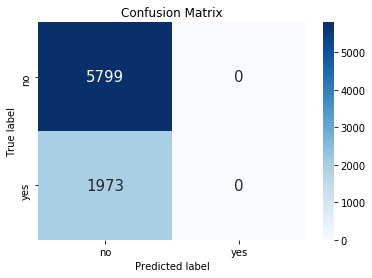

In [42]:
print('----------------------- Classification Report ------------------------\n')
from sklearn import metrics
print(metrics.classification_report(_y_test_null, _y_pred_null))

cf_matrix = confusion_matrix(_y_test_null,_y_pred_null)
ax= plt.subplot()
sns.heatmap(cf_matrix, cmap="Blues", annot=True,annot_kws={"size": 15},fmt='',ax = ax)# font size
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['no', 'yes'])
ax.yaxis.set_ticklabels(['no', 'yes'])
print('-------------------------- Confusion matrix --------------------------\n')

#### 2) Knn Model

In [43]:
# Only on SleepHrsNight

In [44]:
X = data_sleeptrouble['SleepHrsNight'].values.reshape(-1, 1)
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
y = data_sleeptrouble['SleepTrouble'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
# Using GridSearchCV to find best posible K value 
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(60, 120)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)
print("Best Possible Parameter: ", knn_gscv.best_params_)
print("Best Accuracy Score: ", knn_gscv.best_score_)

Best Possible Parameter:  {'n_neighbors': 75}
Best Accuracy Score:  0.7481545064377683


In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 75)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy Score: ',knn.score(X_test, y_test) )

Accuracy Score:  0.7534740092640247


----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1472
           1       0.46      0.09      0.15       471

    accuracy                           0.75      1943
   macro avg       0.61      0.53      0.50      1943
weighted avg       0.69      0.75      0.68      1943

-------------------------- Confusion matrix --------------------------



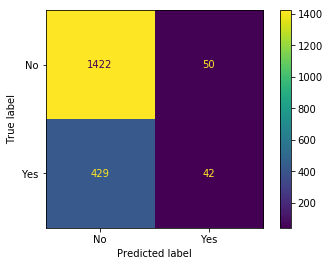

In [49]:
print('----------------------- Classification Report ------------------------\n')
_y_pred=[0 if x == 'No' else 1 for x in y_pred]
_y_test=[0 if x == 'No' else 1 for x in y_test]
from sklearn import metrics
print(metrics.classification_report(_y_test, _y_pred, labels=[0, 1]))

%matplotlib inline
print('-------------------------- Confusion matrix --------------------------\n')
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)

#### KNN Model on complete dataset

In [50]:
from sklearn.model_selection import train_test_split
X =  data_sleeptrouble.drop(columns='SleepTrouble')
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
y = data_sleeptrouble['SleepTrouble'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 75)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy Score: ',knn.score(X_test, y_test))

Accuracy Score:  0.7653113741636645


----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      1472
           1       0.63      0.08      0.14       471

    accuracy                           0.77      1943
   macro avg       0.70      0.53      0.50      1943
weighted avg       0.74      0.77      0.69      1943

-------------------------- Confusion matrix --------------------------



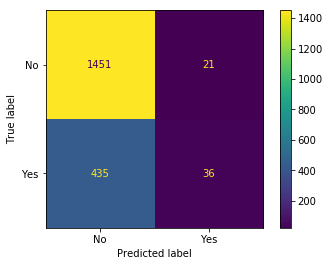

In [52]:
print('----------------------- Classification Report ------------------------\n')

_y_pred=[0 if x == 'No' else 1 for x in y_pred]
_y_test=[0 if x == 'No' else 1 for x in y_test]
from sklearn import metrics
print(metrics.classification_report(_y_test, _y_pred, labels=[0, 1]))

print('-------------------------- Confusion matrix --------------------------\n')
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)  

#### 3) Linear Regression Model on Dataset

In [53]:
# Scaling and train test split
from sklearn.model_selection import train_test_split
X =  data_sleeptrouble.drop(columns='SleepTrouble')
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
y = data_sleeptrouble['SleepTrouble'].values
y = np.array([0 if x == 'No' else 1 for x in y])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_train,y_train)
y_pred= regressor.predict(X_test)  
# Converting prediction probabilities of regression to absolute values of class
y_pred = np.round(abs(y_pred))

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1472
           1       0.59      0.10      0.17       471

    accuracy                           0.76      1943
   macro avg       0.68      0.54      0.52      1943
weighted avg       0.73      0.76      0.70      1943

-------------------------- Confusion matrix --------------------------



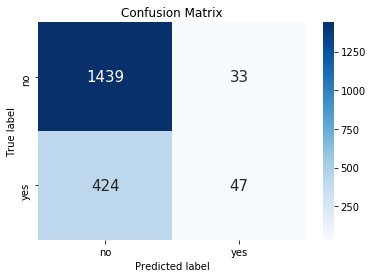

In [56]:
from sklearn import metrics
print('----------------------- Classification Report ------------------------\n')

print(metrics.classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cf_matrix, cmap="Blues", annot=True,annot_kws={"size": 15},fmt='',ax = ax)# font size
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['no', 'yes'])
ax.yaxis.set_ticklabels(['no', 'yes'])
print('-------------------------- Confusion matrix --------------------------\n')

#### 4) Decision Tree Classifier on Dataset

In [57]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1472
           1       0.64      0.73      0.68       471

    accuracy                           0.83      1943
   macro avg       0.77      0.80      0.79      1943
weighted avg       0.84      0.83      0.84      1943

-------------------------- Confusion matrix --------------------------



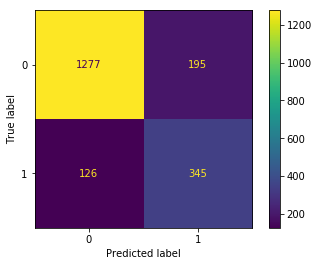

In [58]:
from sklearn import metrics
print('----------------------- Classification Report ------------------------\n')

print(metrics.classification_report(y_test, y_pred))

print('-------------------------- Confusion matrix --------------------------\n')
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  